Temperature

Problem Statement:
Global Land Temperatures By Country includes temperature measurements for various countries around the world, with readings taken at regular intervals over a period of time

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose

c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('Temperature.csv').drop(columns=['Unnamed: 0'],axis=1)

In [4]:
df.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1744-04-01,1.530,4.680,Åland
2,1744-05-01,6.702,1.789,Åland


In [5]:
# Filter data for a specific country, e.g., 'United States'
country_df = df[df['Country'] == 'United States']
country_df

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
524171,1768-09-01,15.420,2.880,United States
524172,1768-10-01,8.162,3.386,United States
524173,1768-11-01,1.591,3.783,United States
524174,1768-12-01,-2.882,4.979,United States
524175,1769-01-01,-3.952,4.856,United States
...,...,...,...,...
526648,2013-05-01,14.073,0.178,United States
526649,2013-06-01,20.198,0.236,United States
526650,2013-07-01,22.074,0.152,United States
526651,2013-08-01,21.168,0.249,United States


In [6]:
# Rename columns to fit Prophet requirements
country_df = country_df.rename(columns={'dt': 'ds', 'AverageTemperature': 'y'})
print(country_df)
# Ensure the date column is in datetime format
country_df['ds'] = pd.to_datetime(country_df['ds'])
print(country_df['ds'])
country_df['ds'].dtype
# Drop rows with missing values in 'y'
country_df = country_df.dropna(subset=['y'])
print(country_df)

                ds       y  AverageTemperatureUncertainty        Country
524171  1768-09-01  15.420                          2.880  United States
524172  1768-10-01   8.162                          3.386  United States
524173  1768-11-01   1.591                          3.783  United States
524174  1768-12-01  -2.882                          4.979  United States
524175  1769-01-01  -3.952                          4.856  United States
...            ...     ...                            ...            ...
526648  2013-05-01  14.073                          0.178  United States
526649  2013-06-01  20.198                          0.236  United States
526650  2013-07-01  22.074                          0.152  United States
526651  2013-08-01  21.168                          0.249  United States
526652  2013-09-01  18.273                          1.210  United States

[2482 rows x 4 columns]
524171   1768-09-01
524172   1768-10-01
524173   1768-11-01
524174   1768-12-01
524175   1769-01-01

In [7]:
country_df.head()

,ds,y,AverageTemperatureUncertainty,Country
524171,1768-09-01,15.420,2.880,United States
524172,1768-10-01,8.162,3.386,United States
524173,1768-11-01,1.591,3.783,United States
524174,1768-12-01,-2.882,4.979,United States
524175,1769-01-01,-3.952,4.856,United States


Initialize and Fit the Prophet Model

In [8]:
# Initialize the Prophet model
model = Prophet()

In [9]:
# Fit the model to the data
model.fit(country_df[['ds', 'y']])

18:31:24 - cmdstanpy - INFO - Chain [1] start processing
18:31:24 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
# Specify a fixed period for future forecasting (e.g., 365 days)
future_period_days = 365

In [11]:
# Create a DataFrame for future dates
future = model.make_future_dataframe(periods=future_period_days)

In [12]:
future.head(3)

,ds
0,1768-09-01
1,1768-10-01
2,1768-11-01


In [13]:
# Make predictions
forecast = model.predict(future)

In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1768-09-01,15.232481,13.936636,16.501379
1,1768-10-01,8.162744,6.935561,9.355519
2,1768-11-01,2.003041,0.726116,3.319861
3,1768-12-01,-2.843448,-3.987943,-1.624718
4,1769-01-01,-3.463736,-4.744713,-2.233157


c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


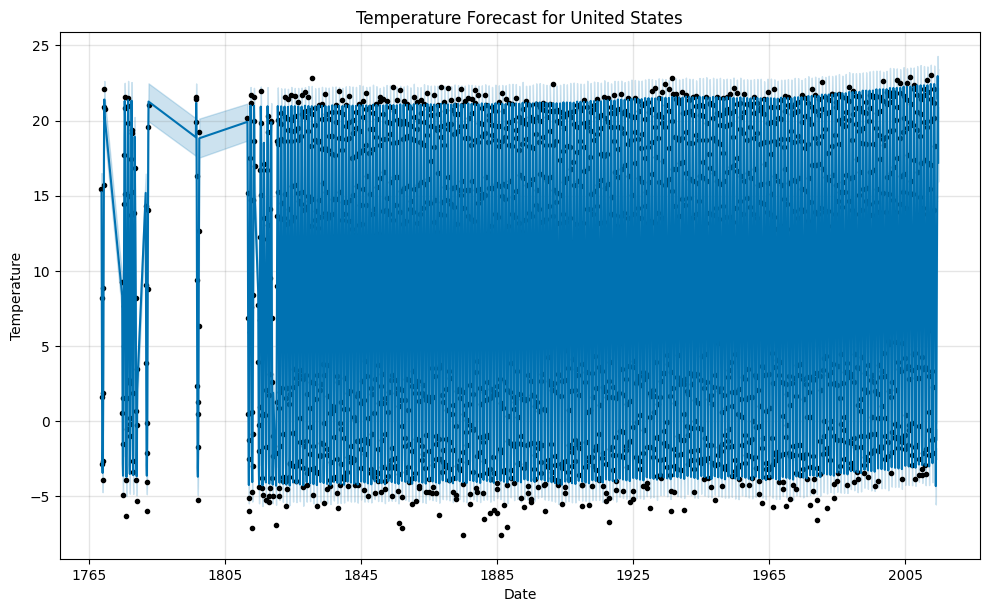

In [15]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Temperature Forecast for United States')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\DANISH\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series c

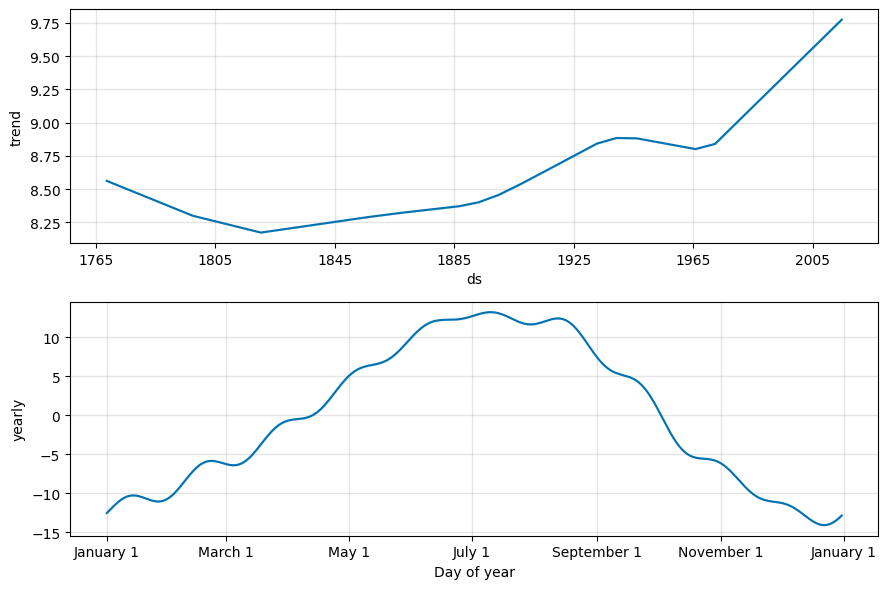

In [16]:
# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()

In [17]:
# Save the forecast to a CSV file
forecast.to_csv('temperature_forecast.csv', index=False)